In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster, single, ward, dendrogram, linkage
from scipy.spatial.distance import pdist
from collections import Counter

## Exploratory data analysis/ exploring the given data set

In [2]:
data = pd.read_csv(r"E:\Masters\Lp4\Statistical Learning for Big Data\Final exam\Q1\Q1_X.csv")

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X965,X966,X967,X968,X969,X970,X971,X972,X973,X974
0,-5.495677,61.106701,48.085207,-9.643993,115.686768,51.502108,11.436144,7.812554,3.514711,15.311307,...,61.828969,4.162347,77.341355,23.920747,12.231024,107.043789,36.421054,106.938706,4.554762,29.136305
1,-9.162872,53.230089,65.145984,0.103767,115.381773,52.432896,1.177402,9.284462,19.596214,-6.731419,...,41.601408,0.670277,84.902793,19.456354,9.507926,105.806904,35.899920,109.626246,1.064167,45.697470
2,-3.405785,53.227501,68.409908,4.953268,113.306605,55.816941,-0.357535,13.769415,11.800787,8.593549,...,64.159507,1.388774,80.411013,20.756886,5.783896,97.847945,36.058565,105.784979,-12.820944,48.610505
3,-3.892957,50.734035,57.628249,0.206105,114.054240,52.443588,2.150279,7.967559,3.736632,14.713485,...,42.926548,11.139315,80.635766,25.277441,3.660440,99.151581,36.310760,109.819277,-1.512681,38.305047
4,16.558304,45.606764,60.748764,10.325164,111.797910,46.308464,-4.504374,13.100508,7.022633,-5.327144,...,74.297145,-0.153593,73.112010,24.626968,4.436568,97.402046,35.762649,115.334813,-1.824509,29.163715


We first check for null values. We see that there are none. 

In [4]:
data.isnull().values.any()

False

We now check for constant features - features with same values across all the rows. We see that there are 98 such features.

In [5]:
data.loc[:,data.apply(pd.Series.nunique) == 1]

,X12,X17,X27,X30,X35,X46,X47,X81,X105,X111,...,X859,X867,X906,X911,X919,X927,X935,X943,X949,X956
0,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
1,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
2,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
3,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
4,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
556,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
557,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034
558,120.43173,0,79.028413,0,11.697618,158.412898,73.670076,80.737017,0,120.371597,...,32.170809,54.732527,128.861963,0,75.712815,0,33.650059,49.857599,65.704078,96.331034


We also check for cloumns which have 0 values only. There are 22 such columns. 

In [6]:
data.loc[:, (data == 0).any(axis = 0) ]

,X17,X30,X105,X148,X168,X178,X201,X234,X242,X253,...,X319,X356,X493,X501,X616,X651,X765,X856,X911,X927
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We remove the constant features since they do not really add any extra information, nor do they aid the process of clustering. This set of constant features will also include features which have only zero values.

In [7]:
data_new = data.drop(data.loc[:,data.apply(pd.Series.nunique) == 1], axis = 1)

In [8]:
data_new.shape

(560, 876)

We now explore the values of the features a little more. We calculate the means of the features and see how they vary.

In [9]:
feature_means = data_new.mean(axis = 0)

In [10]:
feature_means

X1        0.396930
X2       53.658139
X3       55.997536
X4        6.079391
X5      112.930918
           ...    
X970    101.965228
X971     36.182099
X972    110.915361
X973     -0.361701
X974     47.815642
Length: 876, dtype: float64

In [11]:
feature_means.describe()

count    876.000000
mean      45.835725
std       41.340497
min       -1.160890
25%        4.721332
50%       38.688645
75%       75.433022
max      177.906751
dtype: float64

We see that there is a huge standard deviation across of the means, across the features. The means also have a wide range. This suggests that some features have lower values (possibly even negative) while some have very high values. However we expect the distribution to be skewed, since 75% of the values are less than 75.43 (based on the describe function), whereas the maximum value goes upto 177.9. We shall see this in the histogram below.

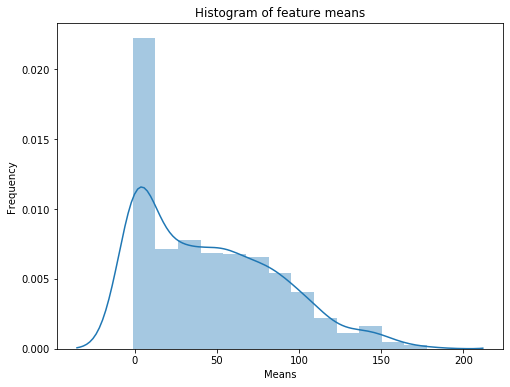

In [12]:
plt.figure(figsize = (8,6))
plt.title('Histogram of feature means')
plt.xlabel('Means')
plt.ylabel('Frequency')
sns.distplot(a = feature_means)

As is clear from the histogram, a lot of features seem to have zero means. There seems to be an even distribution of features with means between 30 or so upto 100. Almost no features have negative means.

Similarly we also plot a distribution for the variation among the values of the features. 

In [13]:
feature_var = data_new.var(axis = 0)

In [14]:
feature_var

X1      54.623380
X2      76.300369
X3      56.379442
X4      38.502128
X5       4.340346
          ...    
X970    24.553447
X971     0.065022
X972    35.595014
X973    28.591622
X974    89.755076
Length: 876, dtype: float64

In [15]:
feature_var.describe()

count    876.000000
mean      53.777155
std       65.196498
min        0.002480
25%        7.642463
50%       28.575088
75%       75.148984
max      449.723508
dtype: float64

We see a huge range of variances among the features. This distirbution should be highly skewed.

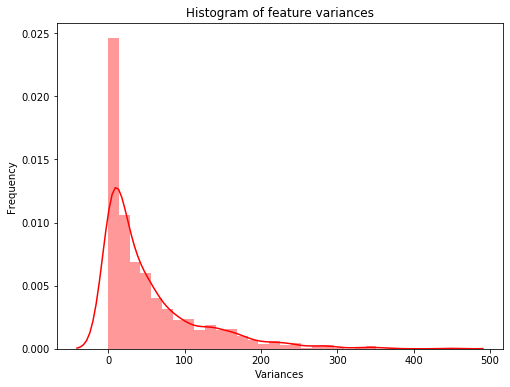

In [16]:
plt.figure(figsize = (8,6))
plt.title('Histogram of feature variances')
plt.xlabel('Variances')
plt.ylabel('Frequency')
sns.distplot(a = feature_var, color = 'r')

We can see the histogram is highly skewed. The range of variances is huge. 

Given the huge amount of variance in both the feature means and the feature variances, it would seem like a good idea to scale the data appropriately before proceeding for analysis. A clustering algorithm like KMeans will not perform very well if there is a huge variance among the values in the dataset because the features with large variances will be more dominant than the other features. Thus, without scaling there is the risk of high-variance features completely taking over. There is also a risk in performing dimensional reduction with a method like PCA, on unscaled data because the first few principal components will be more biased towards the high variance features, and thus we run the risk of losing the information provided by the features with low variance.

In the following cell we scale the data set.

In [17]:
scaler = StandardScaler()

In [18]:
scaled_data = scaler.fit_transform(data_new)

## DIMENSIONALITY REDUCTION USING PCA

Given the huge amount of features, it would be approriate to perform dimensionality reduction using Principal Component Analysis and analyse the most significant principal components. Since PCA ranks components based on the amount of variance they explain, the first component would explain the most amount of variance. We can use a scree plot to check the optimum number of principal components necessary for analysis. 

In [27]:
pca = PCA().fit(scaled_data)
pca_reduced_data = pca.transform(scaled_data)

We now use the scree plot to determine the optimum number of principal components. We look for an elbow in the scree plot. We can clearly see an elbow at y = 3. This means, the first 3 principal components explain a significant amount of variance in the data and and contain most of the signal part of the data, due to huge jumps in the amount of explained variance. The amount of variance explained by the remaining principal components (beyond the third one) is not very significant, as we can clearly see in the plot below that the jumps in explained variance start becoming smaller and smaller and it therefore is an indication of more of the noise part of the data. For good measure and to be sure to not miss out on any essential data, we take the first 5 principal components. 

Text(0, 0.5, 'Explained variance')

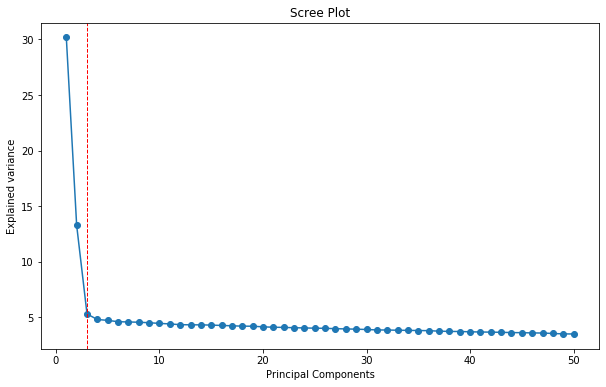

In [28]:
plt.figure(figsize = (10,6))
plt.plot(range(1,51), pca.explained_variance_[:50], '-o')
plt.axvline(3, color = 'red', linestyle = 'dashed', linewidth = 1)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance')

In [29]:
pca_selected_data = pca_reduced_data[:, :5]

We now look at the pairplots of principal components, to see what kind of clustering we can expect. 

In [30]:
pca_selected_data.shape[1]

5

In [31]:
columns = []
for i in range(pca_selected_data.shape[1]):
    columns.append(f"PC {i}")


<Figure size 864x504 with 0 Axes>

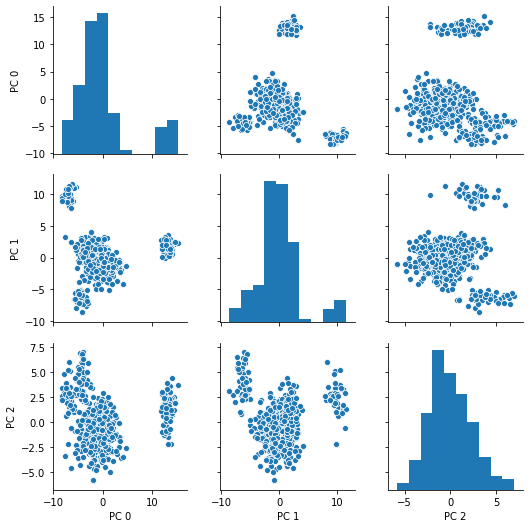

In [32]:
plt.figure(figsize = (12,7))
sns.pairplot(pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3])

<Figure size 864x504 with 0 Axes>

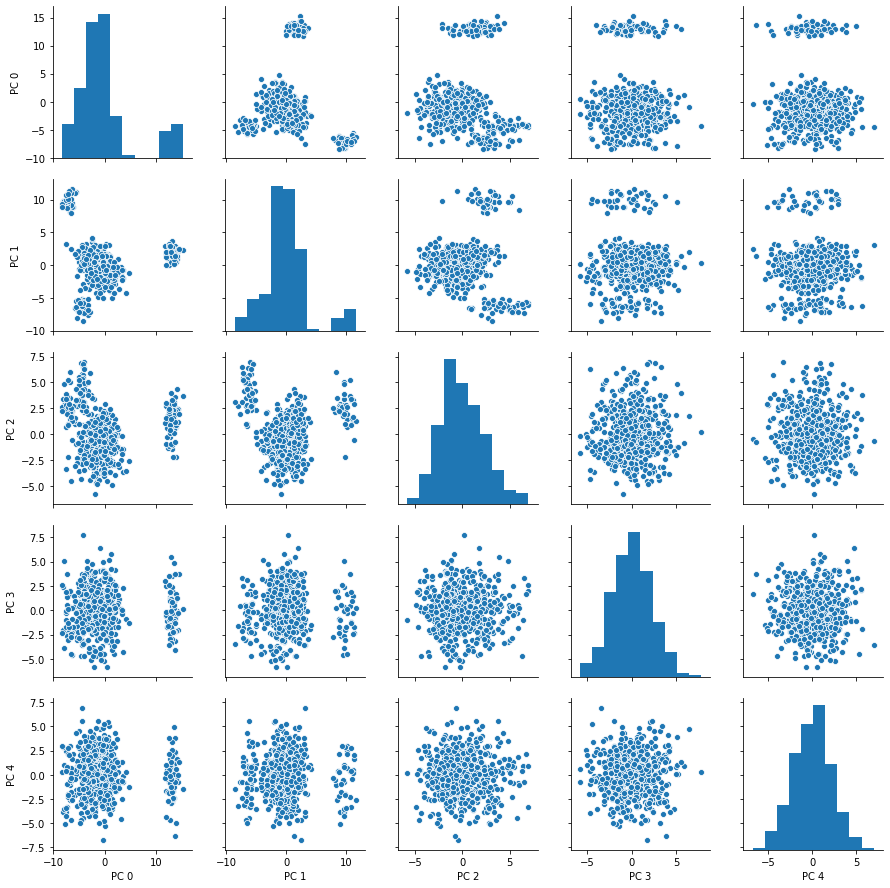

In [33]:
plt.figure(figsize = (12,7))
sns.pairplot(pd.DataFrame(pca_selected_data, columns = columns))

As is evident in the pairplots, we can conclude that there is definitely some clustering in the data. Some clusters are similar to round shapes, while some clusters have elongated shapes. There are also some pairplots with only a single cluster. Most plots seem to have 2 or 3 clusters. It is only interesting to note that on their own, the 4th and 5th principal components do not split the data into groups and thier histograms display a nearly normalised distribution.

### Clustering using KMeans

KMeans works by finding centroids in the data and then searching radially around it. It work well when clusters have similar amount of data points and are rounded in shape. It assigns data points to clusters based on the centroids which are closest. It may not work very well when a cluster is elongated in shape. In the pairplots between principal components we did some clusters which were elongated in shape and many are uneven in size, so we would not expect kmeans to perform very well on such clusters.

Before we separate the clusters in the pairplots, based on the labels given by kmeans, we need to choose the optimum number of clusters. We decide this based on clustering indices such as the Within Cluster Sum of Squares (WCSS) and Silhouette Width. Since Kmeans depends heavily on initial values, it is important to restart it multiple times and report the average values of the corresponding index, for each cluster count. Since we can visually estimate that the number of clusters is not too high (based on the pair plots), we can try out cluster counts ranging from 2 to 7 clusters.

We will implement KMeans two times. The first time we will only restart kmeans once, but loop over it externally to calculate the average values of the indices.


In [36]:
n_clusters = np.arange(2,8)
l = 200 #The number of times kmeans will be restarted.

sil_score_kmeans = np.zeros((len(n_clusters), l), dtype = float)
wcss_score_kmeans = np.zeros((len(n_clusters), l), dtype = float)
db_score_kmeans = np.zeros((len(n_clusters), l), dtype = float)

for i,k in enumerate(n_clusters):
    for j in range(l):
        kmeans = KMeans(n_clusters = k, n_init = 1).fit(pca_selected_data) #Kmeans is only run once internally
        
        sil_score_kmeans[i,j] = silhouette_score(pca_selected_data, kmeans.labels_)
        wcss_score_kmeans[i,j] = kmeans.inertia_
        db_score_kmeans[i,j] = davies_bouldin_score(pca_selected_data, kmeans.labels_)


        
        


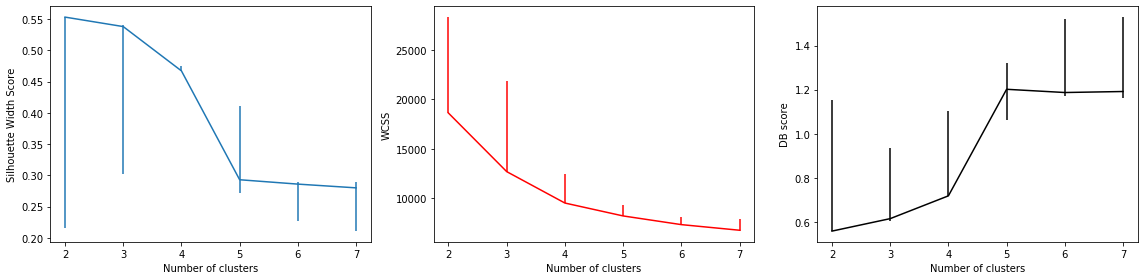

In [37]:
fig, axis = plt.subplots(1,3, figsize = (16,4))

axis[0].errorbar(
                n_clusters,
    np.median(sil_score_kmeans, axis = 1),
    [
        
        np.median(sil_score_kmeans, axis = 1) - np.min(sil_score_kmeans, axis = 1),
        np.max(sil_score_kmeans, axis = 1) - np.median(sil_score_kmeans, axis = 1)
        
    ],

)

axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("Silhouette Width Score")

axis[1].errorbar(
                n_clusters,
    np.median(wcss_score_kmeans, axis = 1),
    [
        
        np.median(wcss_score_kmeans, axis = 1) - np.min(wcss_score_kmeans, axis = 1),
        np.max(wcss_score_kmeans, axis = 1) - np.median(wcss_score_kmeans, axis = 1)
        
    ], color = 'red'

)

axis[1].set_xlabel("Number of clusters")
axis[1].set_ylabel("WCSS")


axis[2].errorbar(
                n_clusters,
    np.median(db_score_kmeans, axis = 1),
    [
        
        np.median(db_score_kmeans, axis = 1) - np.min(db_score_kmeans, axis = 1),
        np.max(db_score_kmeans, axis = 1) - np.median(db_score_kmeans, axis = 1)
        
    ], color = 'black'

)

axis[2].set_xlabel("Number of clusters")
axis[2].set_ylabel("DB score")



fig.tight_layout()

The solid lines show the median values across 200 runs, while the bars show the ranges from the minimum to maximum values of the indices for each count of clusters.

The silhoutte score metric ranges from -1 to 1. Positive values indicate a good separation of clusters, values near 0 indicate that clusters are very close to each other while negative values indicate that samples may have been assigned to the wrong clusters. We compare the median values of the silhouette score for each count of clusters and see that it is maximum for 2 clusters. Interestingly the median value of silhouette score for 2 clusters is also the maximum value, indicating that 2 clusters may be a stable choice.

The WCSS metric is one where we look for minimisation, since it indicates the spread between data points in the same cluster. Since it will obviously keep on decreasing with an increase in the number of clusters, we look for an elbow in the plot. We can see that there elbows at 2 and 3 clusters. There is an elbow when the cluster count is 4 as well, but is not too pronounced. 

The DB score metric takes into account the ratio of within cluster distances to between cluster distances. Clusters which are less dispersed and are farther apart i.e have a lower DB score are a better fit to the data. Here we can see that the median DB score is lowest when number of clusters are 2. 

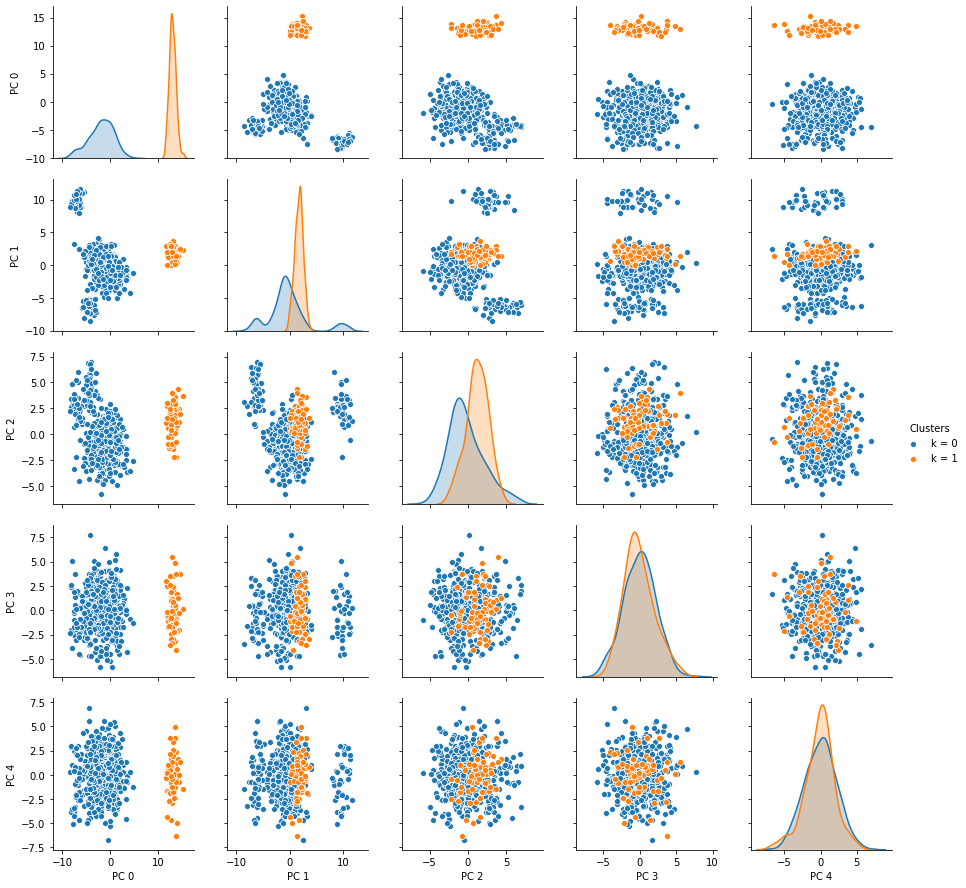

In [38]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in KMeans(n_clusters = 2, n_init = 200).fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns)
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1"])

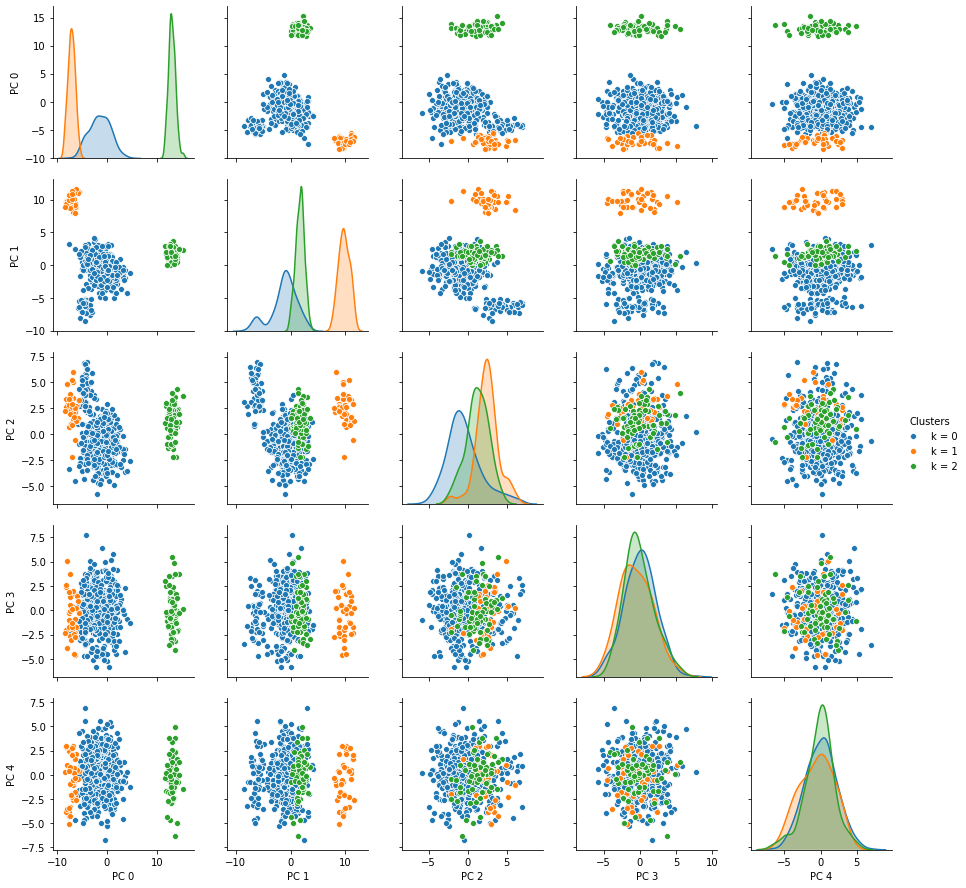

In [39]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in KMeans(n_clusters = 3, n_init = 200).fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns)
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2"])

We see that most of the plots show 3 clusters. However, there is also overlapping of the clusters mainly in the 4th and 5th principal components. This is indicative of reduced variance, but may also mean that those data points are perhaps separated in higher dimensions. 

Now we implement Kmeans by restarting it several times internally. This way each time it only chooses the run, where the measurement index had the best score.

In [40]:
n_clusters = np.arange(2,8)
l = 20 #The number of times kmeans will be restarted.

sil_score_kmeans2 = np.zeros((len(n_clusters), l), dtype = float)
wcss_score_kmeans2 = np.zeros((len(n_clusters), l), dtype = float)
db_score_kmeans2 = np.zeros((len(n_clusters), l), dtype = float)

for i,k in enumerate(n_clusters):
    for j in range(l):
        kmeans = KMeans(n_clusters = k, n_init = 150).fit(pca_selected_data) #Kmeans is only run once internally
        
        sil_score_kmeans2[i,j] = silhouette_score(pca_selected_data, kmeans.labels_)
        wcss_score_kmeans2[i,j] = kmeans.inertia_
        db_score_kmeans2[i,j] = davies_bouldin_score(pca_selected_data, kmeans.labels_)

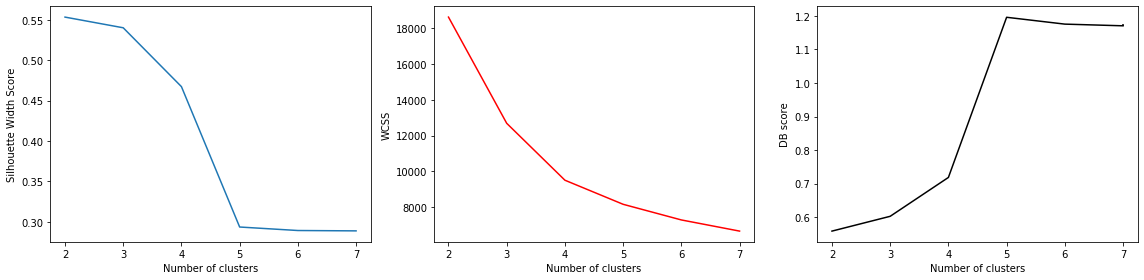

In [41]:
fig, axis = plt.subplots(1,3, figsize = (16,4))

axis[0].errorbar(
                n_clusters,
    np.median(sil_score_kmeans2, axis = 1),
    [
        
        np.median(sil_score_kmeans2, axis = 1) - np.min(sil_score_kmeans2, axis = 1),
        np.max(sil_score_kmeans2, axis = 1) - np.median(sil_score_kmeans2, axis = 1)
        
    ],

)

axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("Silhouette Width Score")

axis[1].errorbar(
                n_clusters,
    np.median(wcss_score_kmeans2, axis = 1),
    [
        
        np.median(wcss_score_kmeans2, axis = 1) - np.min(wcss_score_kmeans2, axis = 1),
        np.max(wcss_score_kmeans2, axis = 1) - np.median(wcss_score_kmeans2, axis = 1)
        
    ], color = 'red'

)

axis[1].set_xlabel("Number of clusters")
axis[1].set_ylabel("WCSS")


axis[2].errorbar(
                n_clusters,
    np.median(db_score_kmeans2, axis = 1),
    [
        
        np.median(db_score_kmeans2, axis = 1) - np.min(db_score_kmeans2, axis = 1),
        np.max(db_score_kmeans2, axis = 1) - np.median(db_score_kmeans2, axis = 1)
        
    ], color = 'black'

)

axis[2].set_xlabel("Number of clusters")
axis[2].set_ylabel("DB score")



fig.tight_layout()

We can see that when we restart kmeans internally several times, we get much more stable results. The variance here as compared to the previous case (where kmeans was only run once internally each time) is negligible. We can again conclude that the ideal number of clusters based on kmeans should most probably be 2, or possibly 3.

Since the 4th and 5th principal components did not contribute much to separation of data, we now plot the pairplots of the first 3 principal components for better visualisation (and because this is easier to include in the report).

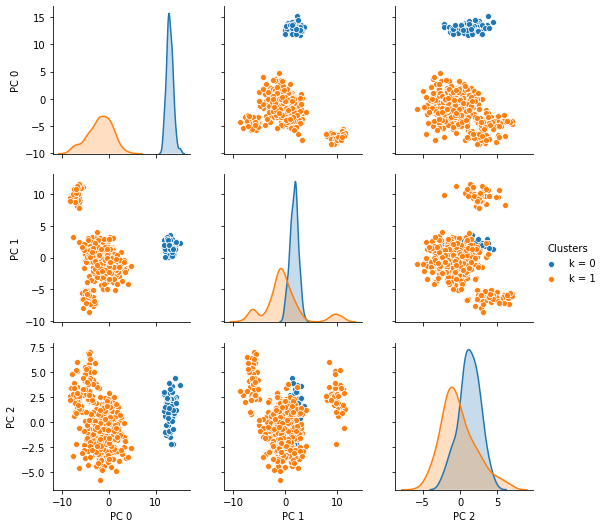

In [42]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in KMeans(n_clusters = 2, n_init = 200).fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1"])

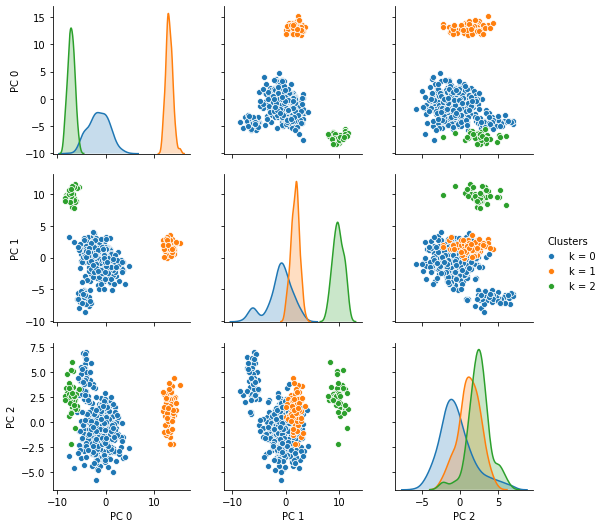

In [43]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in KMeans(n_clusters = 3, n_init = 200).fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2"])

### Clustering using Hierarchical Clustering with Single Linkage

Unlike kmeans, hierarchical clustering does not require us to specify a cluster count in the beginning and is a deterministic algortihm. It has no random initialisation. It initially assigns every single data point 1 cluster and then goes on combining clusters which are closest to each other, until there is just 1 big cluster left. This can be demonstrated as linkage tree (known as a dendogram), which will be shown below. To determine the optimum number of clusters, we would require some sort of stopping criterion.

The linkage function determines which clusters are closest, for the algorithm to combine.  Single Linkage computes proximity between two clusters as the proximity between their two closest data points.

In [44]:
D = pdist(pca_selected_data, metric = 'euclidean')

P = single(D)

#pdist computes pairwise distances between observations in space.
#single performs single linkage and returns a single matrix encoding the dendogram.

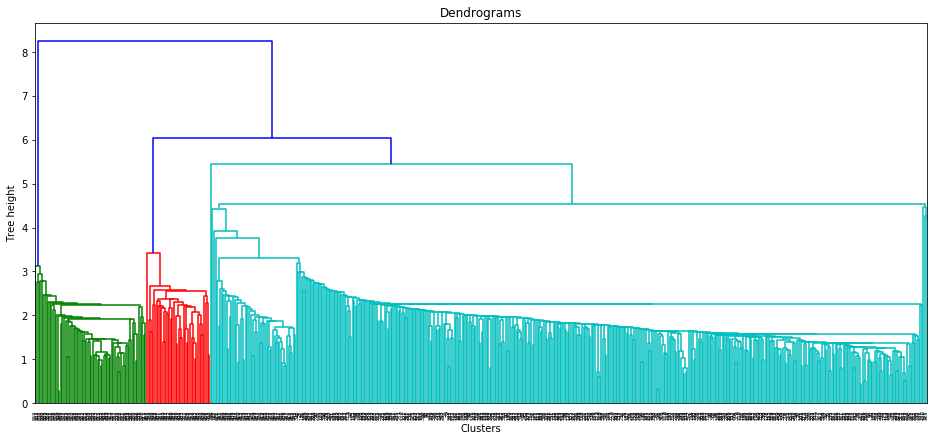

In [93]:
plt.figure(figsize=(16, 7))
plt.xlabel("Clusters")
plt.ylabel("Tree height")
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(pca_selected_data, method='single'))

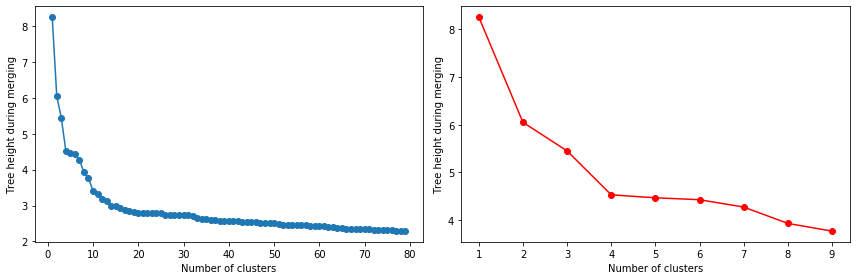

In [46]:
fig, axis = plt.subplots(1,2,figsize = (12,4))

axis[0].plot(np.arange(560,0,step = -1)[481:], P[480:,2], 'o-')
axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("Tree height during merging")

axis[1].plot(np.arange(560,0,step = -1)[551:], P[550:,2], 'o-', color = 'red')
axis[1].set_xlabel("Number of clusters")
axis[1].set_ylabel("Tree height during merging")

fig.tight_layout()

The tree height during merging increases as the number of clusters remaining decreases. This is because as we combine more and more clusters, the ones remaining would be farther apart and would be bigger clusters. The tree height during merging is kind of analogous to the WCSS index when using kmeans, and can thus be used to determine what would be a good value for the number of clusters. 

When the cost of joining 2 clusters is relatively high, it would be an indication that those 2 clusters were actually well separated. For example, let us consider a case where we were to join 2 clusters and reduce the total number of clusters from x to x-1. If the cost of joining these 2 clusters was relatively high (when compared to previous joinings of clusters) i.e if there was a significant jump in the value of the tree height, then it could possibly be an indication that having x clusters is more optimal than having x-1 clusters. 

In the plot on the left, we can see that the most significant jumps in tree heights happen when the cluster count is around 5 or maybe less than 5. In the plot on the right, we zoom in and see that there are significant jumps when the number of clusters reduces from 4 to 3, then from 3 to 2 and the biggest jump is from 2 to 1. It therefore seems reasonable to further investigate 2, 3 or 4 clusters. 

In [47]:
pd.DataFrame({"Clusters" : np.arange(1,10), "Tree height" : P[550:,2][::-1]})

,Clusters,Tree height
0,1,8.254983
1,2,6.049240
2,3,5.451090
3,4,4.530509
4,5,4.468742
5,6,4.428384
6,7,4.274288
7,8,3.932091
8,9,3.770546


In order to decide upon a reasonable number of clusters, we need to decide on some sort of a threshold, which will act as a cutoff i.e only clusters below that height will be retained. Setting this cutoff at around 5.5 seems to be reasonable as this would give us 3 clusters.

In [48]:
labels1 = fcluster(P, t = 5.5, criterion = 'distance')

In [49]:
np.unique(labels1)

array([1, 2, 3], dtype=int32)

We can see that setting the cutoff at 5.5 gives us 3 clusters.

In [50]:
pd.Series(labels1).value_counts()

3    450
1     70
2     40
dtype: int64

We see that the third cluster is more populated than the first and second clusters. Although it does not seem too unreasonable, it might be a good idea to also investigate other cluster counts. 

In [51]:
labels2 = fcluster(P, t = 5, criterion = 'distance')

In [52]:
np.unique(labels2)

array([1, 2, 3, 4], dtype=int32)

In [53]:
pd.Series(labels2).value_counts()

3    449
1     70
2     40
4      1
dtype: int64

When we check values for 4 clusters, we see that the 4th cluster has only a single point, which is obviously not reasonable. There 4 clusters definitely does not work. 

In [54]:
labels3 = fcluster(P, t = 7, criterion = 'distance')

In [55]:
np.unique(labels3)

array([1, 2], dtype=int32)

In [56]:
pd.Series(labels3).value_counts()

2    490
1     70
dtype: int64

When we set the cutoff such that we only get 2 clusters, one cluster is 7 times as populated as the other. This seems less reasonable than the case when set the cutoff to get 3 clusters. Therefore, 3 clusters seems like a reasonable choice when using single linkage. 3 clusters are also evident in the pairplots of the first three principal components. So while kmeans suggested that 2 clusters was the best choice, single linkage suggests that 3 clusters is the best choice. We can also explore metrics such as silhouette score and Davies-Bouldin score as another way to find the optimum number of clusters.

In [57]:
n_clusters = np.arange(2,10)

sil_score_hc_single = np.zeros((len(n_clusters),),dtype = float)
db_score_hc_single = np.zeros((len(n_clusters),),dtype = float)

for i,j in enumerate(n_clusters):
    labels = fcluster(P, t = P[559 - j, 2], criterion = 'distance')
    
    sil_score_hc_single[i] = silhouette_score(pca_selected_data, labels)
    db_score_hc_single[i] = davies_bouldin_score(pca_selected_data, labels)

Text(0, 0.5, 'DB Score')

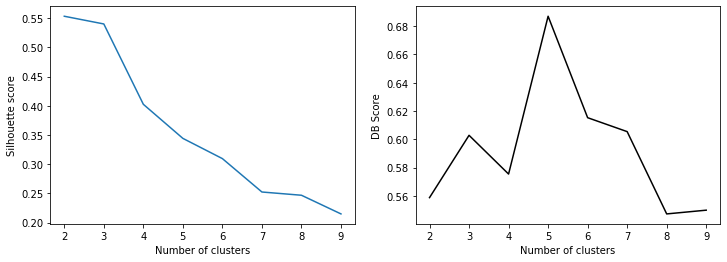

In [94]:
fig, axis = plt.subplots(1,2, figsize = (12,4))

axis[0].plot(n_clusters, sil_score_hc_single)
axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("Silhouette score")

axis[1].plot(n_clusters, db_score_hc_single, color = 'black')
axis[1].set_xlabel("Number of clusters")
axis[1].set_ylabel("DB Score")

According to the metrics used, 2 clusters seems to be the best choice. However, we had seen that the distribution of data points into 2 clusters is very uneven, with 1 cluster being 7 times the size of the other. What is also interesting is that the Davies Bouldin score suggests that a cluster count of 4 is better than a cluster count of 3, but when we while looking at the sizes of the clusters, we had clearly seen that 4 clusters does not work with single linkage since one of those clusters had only 1 point. The Davies Bouldin score also happens to be the lowest for a cluster count of 8, but that would obviously be wrong based on the tree heights we had explored earlier. Therefore it does seem that single linkage by itself conclusive enough when using hierarchical clustering. It therefore makes sense to also explore another linkage method such as ward linkage.

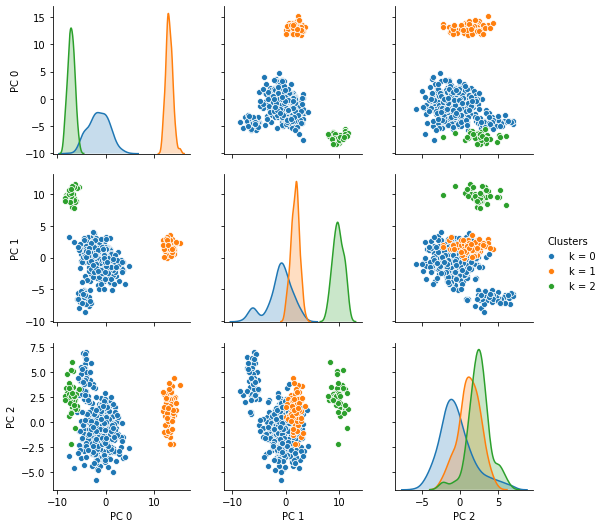

In [59]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='single').fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2"])

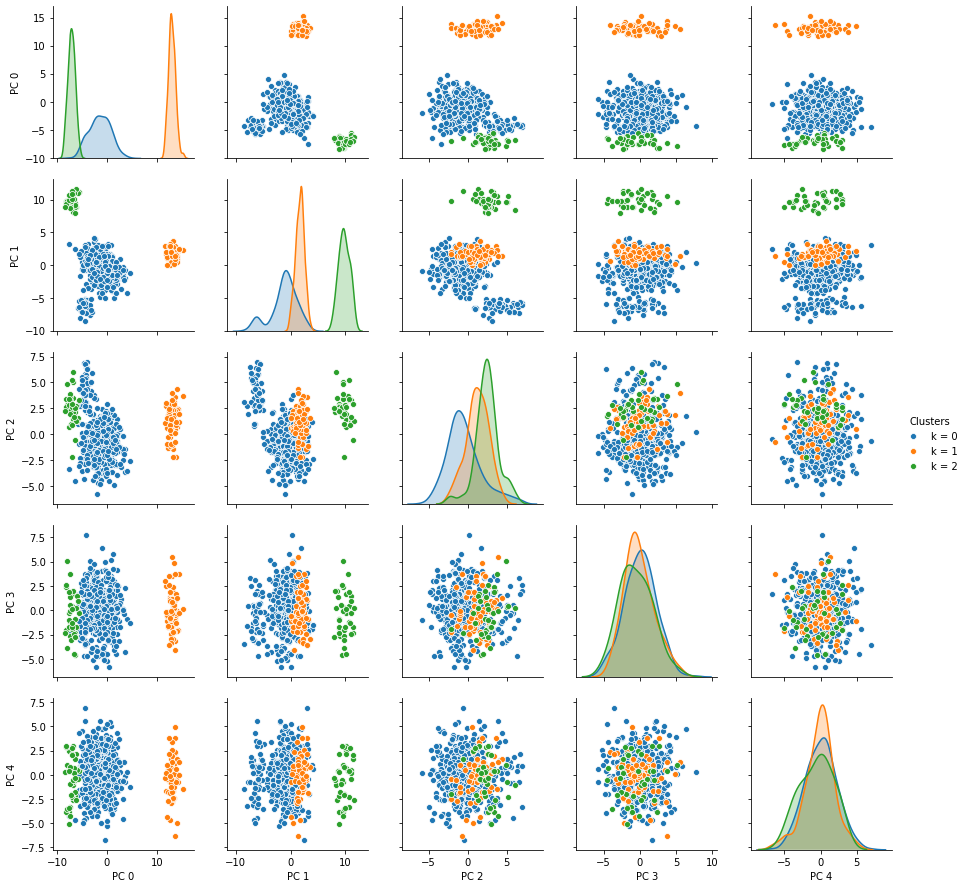

In [60]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='single').fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns)
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2"])

### Clustering using Hierarchical Clustering with Ward Linkage

Ward linkage works differently from single linkage as it favours convex clusters. In the pairplots we did notice a few elongated clusters, but not too many. Nevertheless, it might be a good idea to try it out for completeness. 

Ward linkage is based on minimal increase in sum of squares. Proximity between two clusters is the magnitude by which the summed square in their joint cluster will be greater than the combined summed square in these two clusters i.e SS(12) - (SS1+SS2). This form of linkage is also the closest to kmeans in terms of properties. Ward linkage is however better at separating clusters of uneven sizes or clusters which are randomly scattered.

In [61]:
P1 = ward(D)

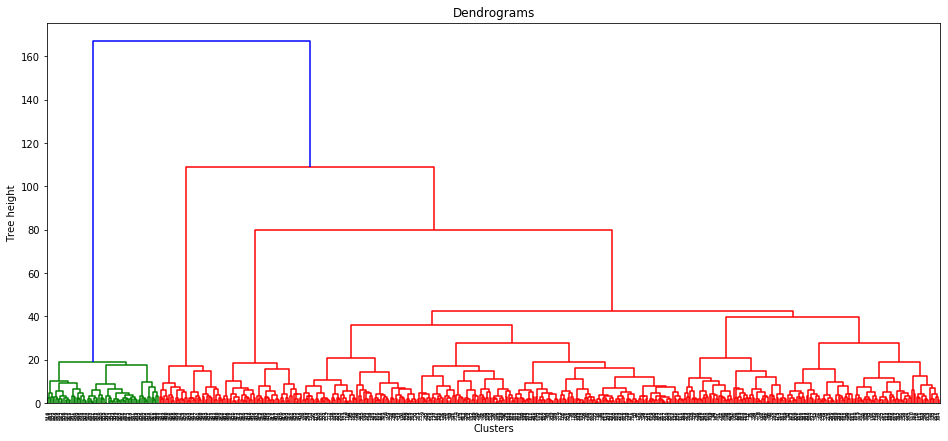

In [95]:
plt.figure(figsize=(16, 7))
plt.xlabel('Clusters')
plt.ylabel('Tree height')
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(pca_selected_data, method='ward'))

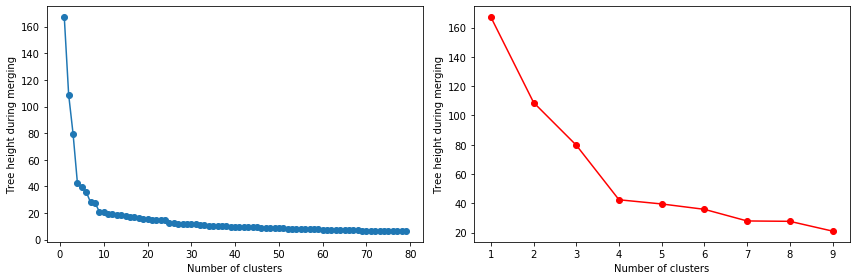

In [63]:
fig, axis = plt.subplots(1,2,figsize = (12,4))

axis[0].plot(np.arange(560,0,step = -1)[481:], P1[480:,2], 'o-')
axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("Tree height during merging")

axis[1].plot(np.arange(560,0,step = -1)[551:], P1[550:,2], 'o-', color = 'red')
axis[1].set_xlabel("Number of clusters")
axis[1].set_ylabel("Tree height during merging")

fig.tight_layout()

In [64]:
pd.DataFrame({"Clusters" : np.arange(1,10), "Tree height" : P1[550:,2][::-1]})

,Clusters,Tree height
0,1,167.202157
1,2,108.853494
2,3,79.690307
3,4,42.415777
4,5,39.558288
5,6,35.885837
6,7,27.946927
7,8,27.692495
8,9,21.015067


In [65]:
labels4 = fcluster(P1, t = 90, criterion = 'distance')

In [66]:
np.unique(labels4)

array([1, 2, 3], dtype=int32)

In [67]:
pd.Series(labels4).value_counts()

3    450
1     70
2     40
dtype: int64

In [68]:
labels5 = fcluster(P1, t = 50, criterion = 'distance')

In [69]:
np.unique(labels5)

array([1, 2, 3, 4], dtype=int32)

In [70]:
pd.Series(labels5).value_counts()

4    400
1     70
3     50
2     40
dtype: int64

We can see that ward linkage does a much better job of separating the data into 4 clusters, when compared with single linkage. However the optimum number of clusters still seems to be either 2 or 3, although 4 clusters does not look too bad either. We can again look at the silhouette score and Davies-Bouldin score.

In [71]:
n_clusters = np.arange(2,10)

sil_score_hc_ward = np.zeros((len(n_clusters),),dtype = float)
db_score_hc_ward = np.zeros((len(n_clusters),),dtype = float)

for i,j in enumerate(n_clusters):
    labels = fcluster(P1, t = P1[559 - j, 2], criterion = 'distance')
    
    sil_score_hc_ward[i] = silhouette_score(pca_selected_data, labels)
    db_score_hc_ward[i] = davies_bouldin_score(pca_selected_data, labels)

Text(0, 0.5, 'DB Score')

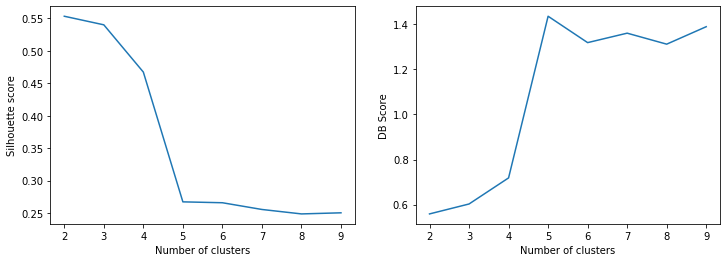

In [72]:
fig, axis = plt.subplots(1,2, figsize = (12,4))

axis[0].plot(n_clusters, sil_score_hc_ward)
axis[0].set_xlabel("Number of clusters")
axis[0].set_ylabel("Silhouette score")

axis[1].plot(n_clusters, db_score_hc_ward)
axis[1].set_xlabel("Number of clusters")
axis[1].set_ylabel("DB Score")

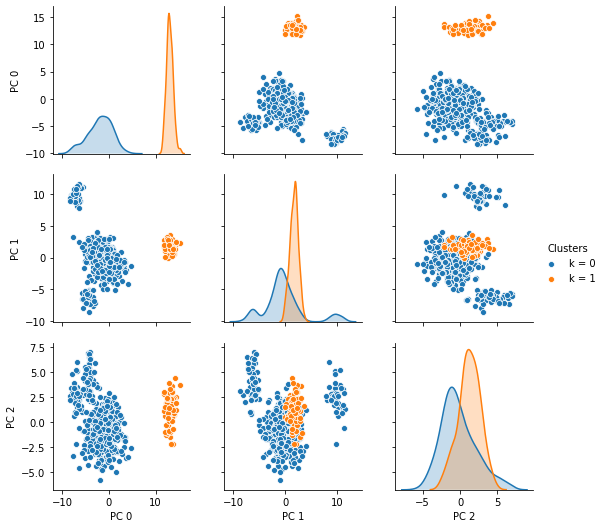

In [96]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward').fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1"])

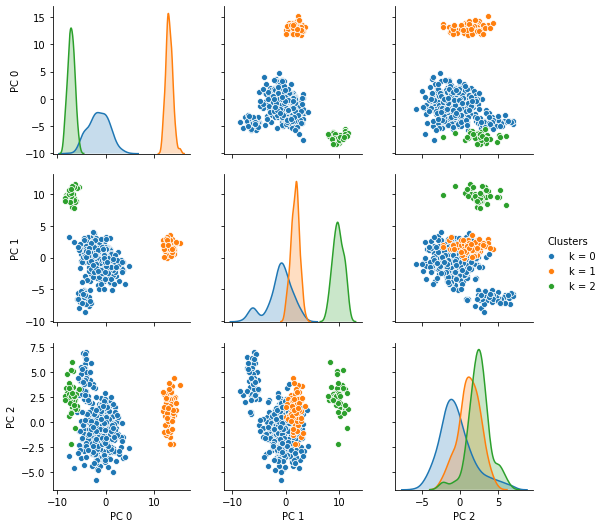

In [74]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward').fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2"])

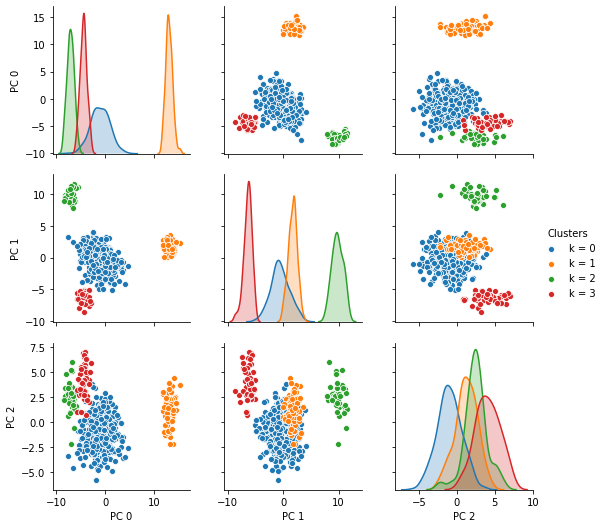

In [75]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward').fit(pca_selected_data).labels_]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2", "k = 3"])

We can see that in some of the plots 4 clusters actually makes more sense. But there are some plots where 3 clusters look more reasonable. It does seem like a compromise. The blue and orange clusters show overlapping in a couple of plots, but perhaps they are well separated in higher dimensional space.

### Clustering using Gaussian Mixture Models

Gaussian Mixture Models work well when clusters overlap a lot and are not circular in shape. They use the principle of expectation-maximisation (which assigns a mean vector and a covariance matrix to each distribution) and are a distribution based algortihm. Each data point is assigned a probability of belonging to a certain distribution with the use of a soft clustering technique. 

In our pairplots, there were not too many clusters which were non standard in shape. There were only a few. There were 2 plots where the blue and orange clusters were overlapping and were sort of elliptical in shape.  Thus GMM may not provide any added advantage, but it would be interesting to see how it performs. 

Because GMM also has random initialisation like Kmeans, we run an external loop 200 times to get 200 values for value of the number of components. 

In [76]:
n_components = np.arange(2,9)
l = 200 #The number of times gmm will be restarted.

BIC_score_gmm = np.zeros((len(n_components), l), dtype = float)
AIC_score_gmm = np.zeros((len(n_components), l), dtype = float)


for i,k in enumerate(n_components):
    for j in range(l):
        gm = GaussianMixture(n_components = k, n_init = 1) 
        gm.fit_predict(pca_selected_data)
        BIC_score_gmm[i,j] = gm.bic(pca_selected_data)
        AIC_score_gmm[i,j] = gm.aic(pca_selected_data)
    

Text(0, 0.5, 'AIC score')

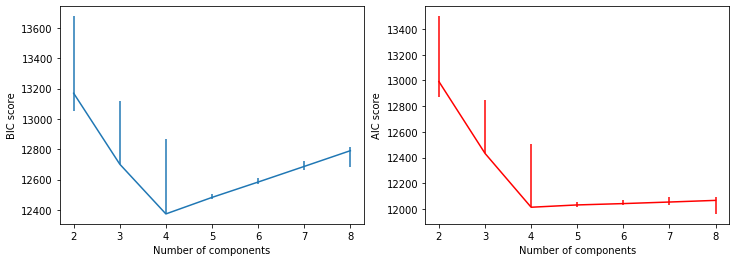

In [77]:
fig, axis = plt.subplots(1,2, figsize = (12,4))
#import ipdb;ipdb.set_trace(0)
axis[0].errorbar(
    
    
                n_components,
    np.median(BIC_score_gmm, axis = 1),
    [
        
        np.median(BIC_score_gmm, axis = 1) - np.min(BIC_score_gmm, axis = 1),
        np.max(BIC_score_gmm, axis = 1) - np.median(BIC_score_gmm, axis = 1)
        
    ],

)


axis[0].set_xlabel("Number of components")
axis[0].set_ylabel("BIC score")

axis[1].errorbar(
                n_components,
    np.median(AIC_score_gmm, axis = 1),
    [
        
        np.median(AIC_score_gmm, axis = 1) - np.min(AIC_score_gmm, axis = 1),
        np.max(AIC_score_gmm, axis = 1) - np.median(AIC_score_gmm, axis = 1)
        
    ], color = 'red'

)

axis[1].set_xlabel("Number of components")
axis[1].set_ylabel("AIC score")



Just like Kmeans, GMM can also be restarted internally. So we compute the AIC and BIC score a second time, but this time we restart GMM 150 times internally, while also running an external loop 10 times.

In [97]:
n_components = np.arange(2,9)
l = 10 #The number of times gmm will be restarted.

BIC_score_gmm = np.zeros((len(n_components), l), dtype = float)
AIC_score_gmm = np.zeros((len(n_components), l), dtype = float)


for i,k in enumerate(n_components):
    for j in range(l):
        gm = GaussianMixture(n_components = k, n_init = 150) #Gmm is run 150 times internally
        gm.fit_predict(pca_selected_data)
        BIC_score_gmm[i,j] = gm.bic(pca_selected_data)
        AIC_score_gmm[i,j] = gm.aic(pca_selected_data)

Text(0, 0.5, 'AIC score')

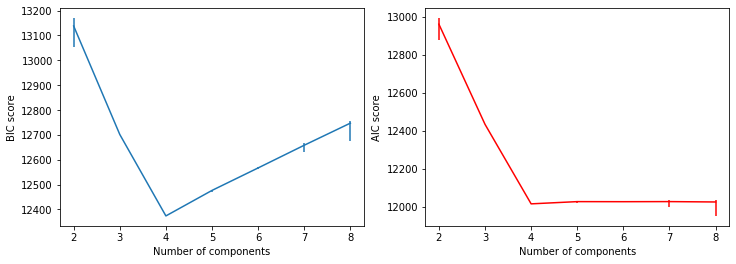

In [98]:
fig, axis = plt.subplots(1,2, figsize = (12,4))
#import ipdb;ipdb.set_trace(0)
axis[0].errorbar(
    
    
                n_components,
    np.median(BIC_score_gmm, axis = 1),
    [
        
        np.median(BIC_score_gmm, axis = 1) - np.min(BIC_score_gmm, axis = 1),
        np.max(BIC_score_gmm, axis = 1) - np.median(BIC_score_gmm, axis = 1)
        
    ],

)


axis[0].set_xlabel("Number of components")
axis[0].set_ylabel("BIC score")

axis[1].errorbar(
                n_components,
    np.median(AIC_score_gmm, axis = 1),
    [
        
        np.median(AIC_score_gmm, axis = 1) - np.min(AIC_score_gmm, axis = 1),
        np.max(AIC_score_gmm, axis = 1) - np.median(AIC_score_gmm, axis = 1)
        
    ], color = 'red'

)

axis[1].set_xlabel("Number of components")
axis[1].set_ylabel("AIC score")


We can that the BIC and AIC score values are much more stable. The optimum number of components is still equal to 4. We therefore set the number of components to 4 and run GMM on our data. We restart it 200 times internally so that it gives the best result. 

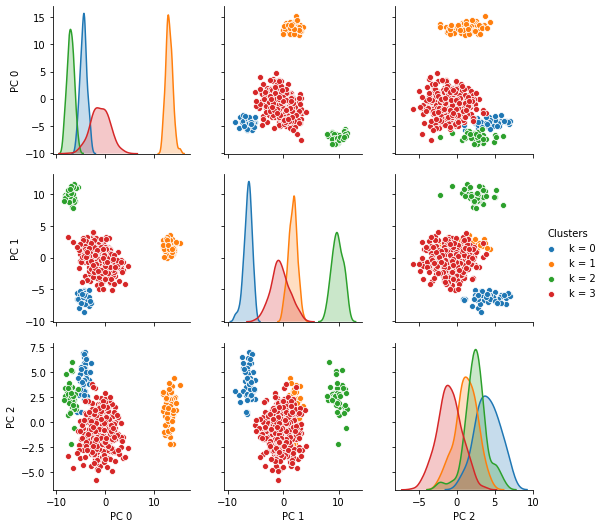

In [78]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in GaussianMixture(n_components = 4, n_init = 200).fit_predict(pca_selected_data)]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2", "k = 3"])

We also restart GMM 1000 times internally to see if there are any significant changes in the results. 

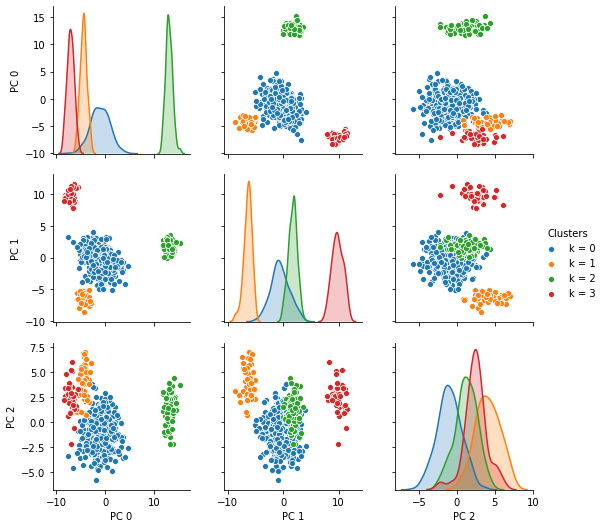

In [100]:
a = pd.DataFrame({"Clusters": [f"k = {i}" for i in GaussianMixture(n_components = 4, n_init = 1000).fit_predict(pca_selected_data)]})
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters", hue_order = ["k = 0", "k = 1", "k = 2", "k = 3"])

### Clustering using DBSCAN

We now explore a density based clustering algorithm called DBSCAN. Because it is density based, it can easily separate arbitrarily shaped clusters and is very good at separating noise from actual data. It does not work well if the dataset is too sparse. Since we have 560 samples in our data, DBSCAN is worth a shot. It does not require us to specify the number of clusters we need. It separates noise from data and determines the optimum number of clusters on its own. 

DBSCAN is best used when a dataset has a huge number of features i.e in high dimensions when euclidean distance breaks and when all clusters have similar density. We had used PCA to reduce our number of dimensions to just 5. We can still see how it uses density based clustering to separate data points.

DBSCAN is very sensitive to tuning of its hyperparamters as we shall see below.

In [81]:
dbscan = DBSCAN(eps = 2, min_samples = 10)

#eps is the maximum distance between 2 points for them to still be considered as 1 cluster.
#If the distance between 2 points is greater than this, then are considered to be in separate clusters.

In [82]:
dbscan.fit_predict(pca_selected_data)

array([-1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1,  0,
       -1,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1,  0,
       -1, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0,  0, -1, -1, -1,
       -1, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0, -1, -1,
        0, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,
       -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,
       -1,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1,
        0,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,  0, -1,
       -1,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
       -1, -1,  0,  0, -1

C:\Users\Siddhant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Siddhant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


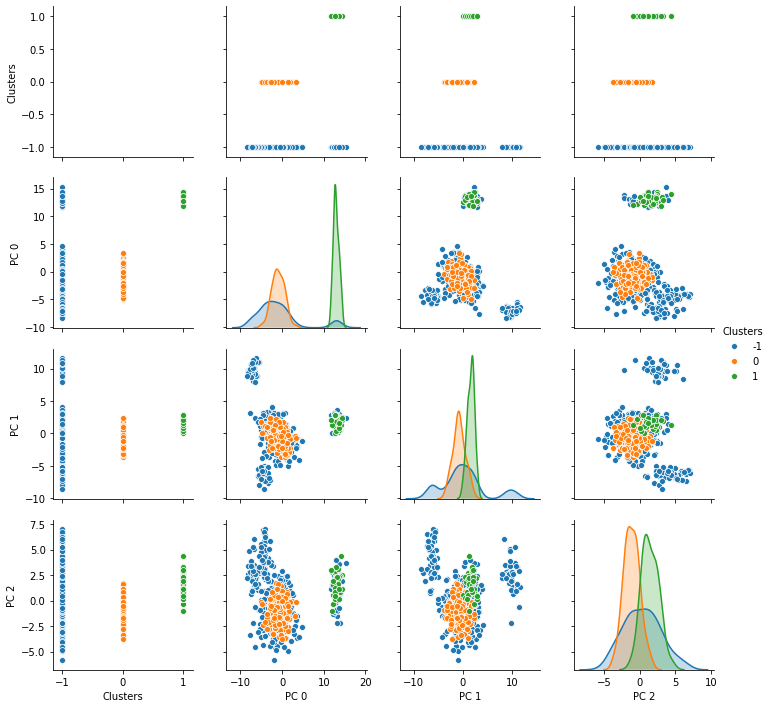

In [83]:
a = pd.DataFrame(dbscan.fit_predict(pca_selected_data), columns = ["Clusters"])
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters")

In [101]:
dbscan1 = DBSCAN(eps = 0.5, min_samples = 10)
dbscan1.fit_predict(pca_selected_data)


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

C:\Users\Siddhant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Siddhant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


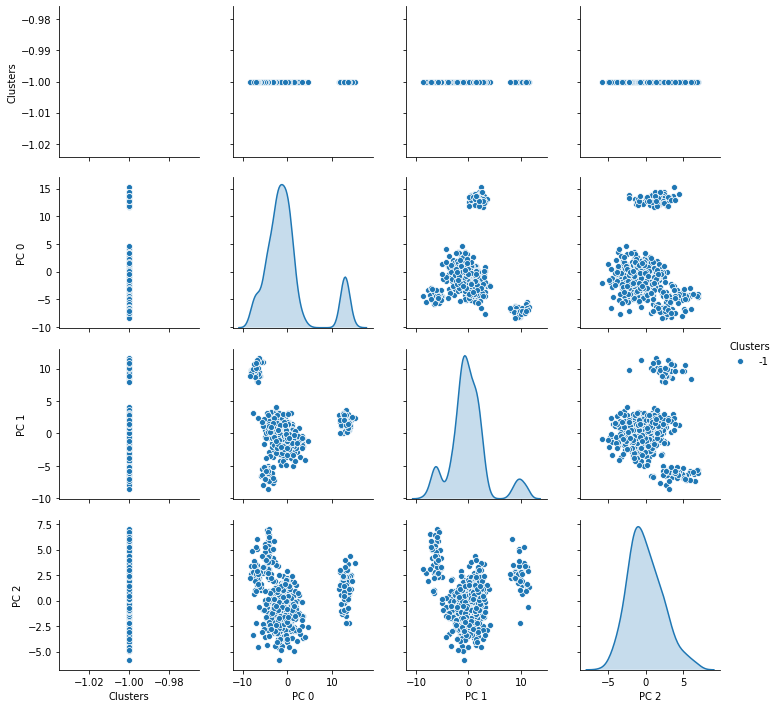

In [102]:
a = pd.DataFrame(dbscan1.fit_predict(pca_selected_data), columns = ["Clusters"])
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters")

We can try to find the optimum value for the hyperparameter eps or epsilon, since DBSCAN is very sensitive to it.

In [86]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pca_selected_data)
distances, indices = nbrs.kneighbors(pca_selected_data)

In [87]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

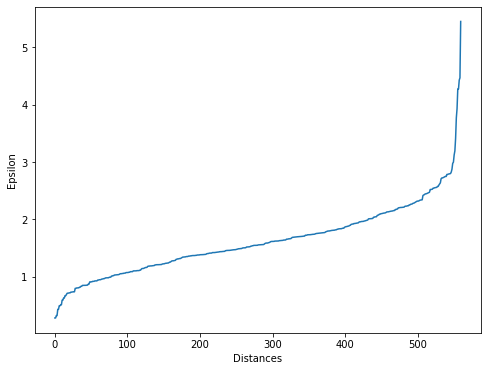

In [88]:
plt.figure(figsize = (8,6))
plt.xlabel("Distances")
plt.ylabel("Epsilon")
plt.plot(distances)

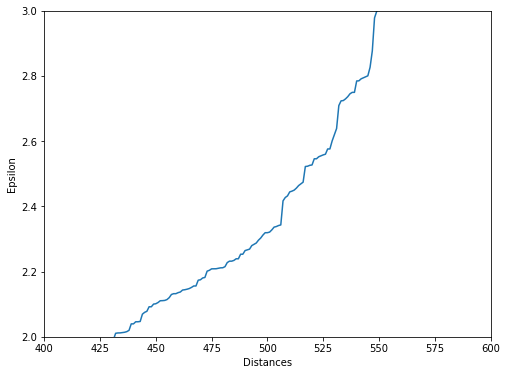

In [89]:
plt.figure(figsize = (8,6))
plt.xlabel("Distances")
plt.ylabel("Epsilon")
plt.xlim([400, 600])
plt.ylim([2,3])
plt.plot(distances)

The optimal value of epsilon will be found at the point of maximum curvature. In our case, we it is roughly around 2.5

In [90]:
dbscan = DBSCAN(eps = 2.5, min_samples = 5)
dbscan.fit_predict(pca_selected_data)

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0

C:\Users\Siddhant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Siddhant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


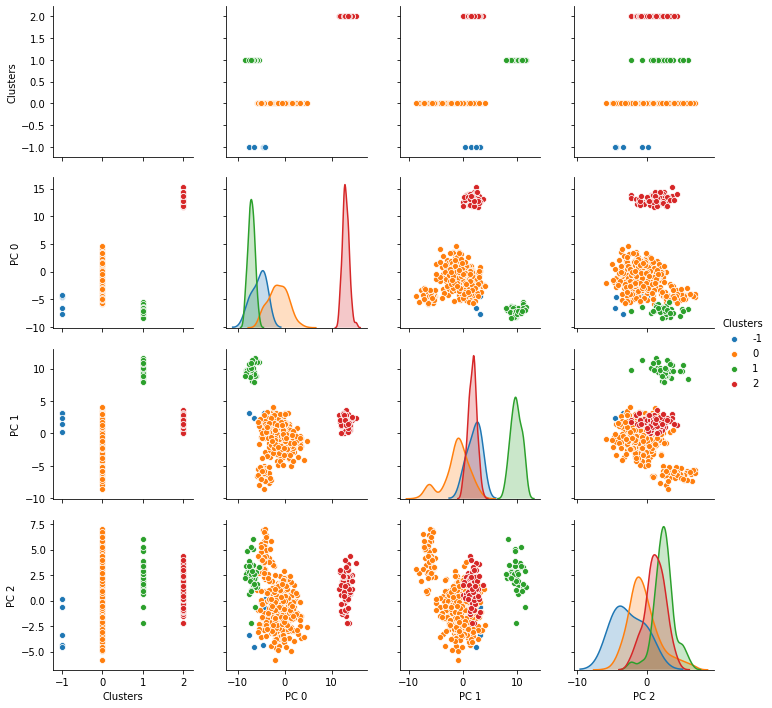

In [91]:
a = pd.DataFrame(dbscan1.fit_predict(pca_selected_data), columns = ["Clusters"])
b = pd.DataFrame(pca_selected_data, columns = columns).iloc[:,:3]
y = pd.concat([a,b], axis = 1)
sns.pairplot(y, hue = "Clusters")